# Random Forest - Intro + Bias Variance Tradeoff

In [200]:
import numpy as np
from sklearn.datasets import make_regression, make_classification, make_circles
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score, r2_score
import matplotlib.pyplot as plt

# For Classification

In [201]:
X, y = make_circles(n_samples=500, noise=0.2, random_state=42, factor=0.5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

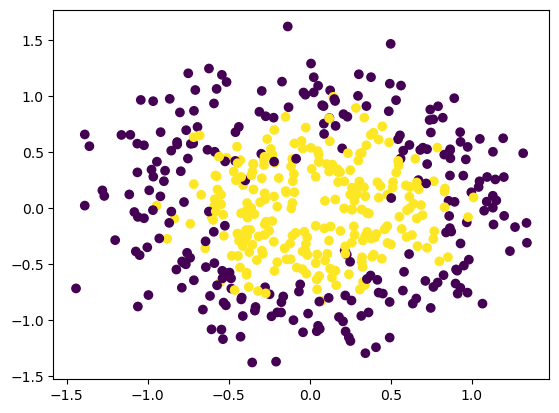

In [202]:
plt.scatter(X[:,0], X[:,1], c=y)

### Using Decision Trees
- Low bias, High variance model


Train accuracy : 1.0
Test accuracy : 0.87



<Axes: >

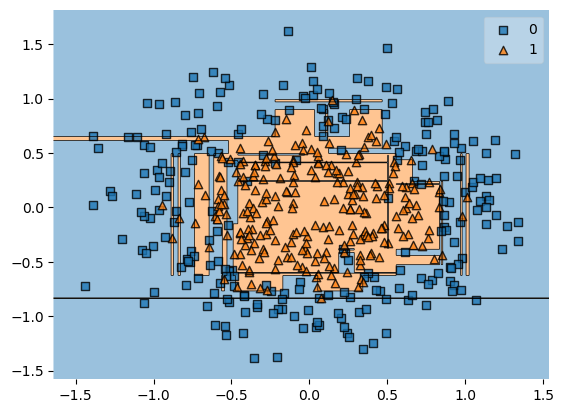

In [203]:
dt = DecisionTreeClassifier(max_depth=None)    # fully grown
dt.fit(X_train, y_train)
y_pred_train = dt.predict(X_train)
y_pred = dt.predict(X_test)
print(f'''
Train accuracy : {accuracy_score(y_train, y_pred_train)}
Test accuracy : {accuracy_score(y_test, y_pred)}
''')

plot_decision_regions(X=X, y=y, clf=dt, zoom_factor=5)

### Using Random Forest Classifier
- Keeps bias low while reducing variance as well - reduces overfitting


Train accuracy : 1.0
Test accuracy : 0.92



<Axes: >

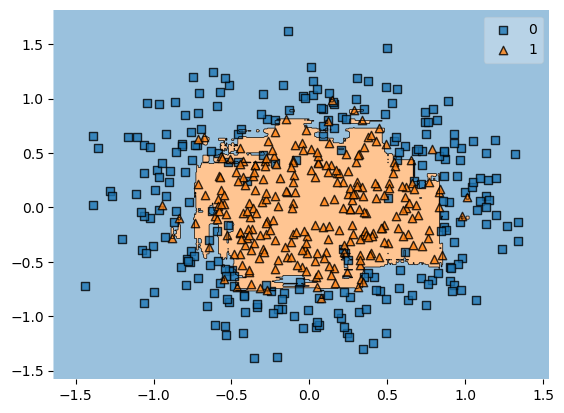

In [206]:
rfc = RandomForestClassifier(n_estimators=100, random_state=41)
rfc.fit(X_train, y_train)
y_pred_train = rfc.predict(X_train)
y_pred = rfc.predict(X_test)

print(f'''
Train accuracy : {accuracy_score(y_train, y_pred_train)}
Test accuracy : {accuracy_score(y_test, y_pred)}
''')

plot_decision_regions(X=X, y=y, clf=rfc, zoom_factor=5)

Text(0.5, 1.0, 'Random Forest')

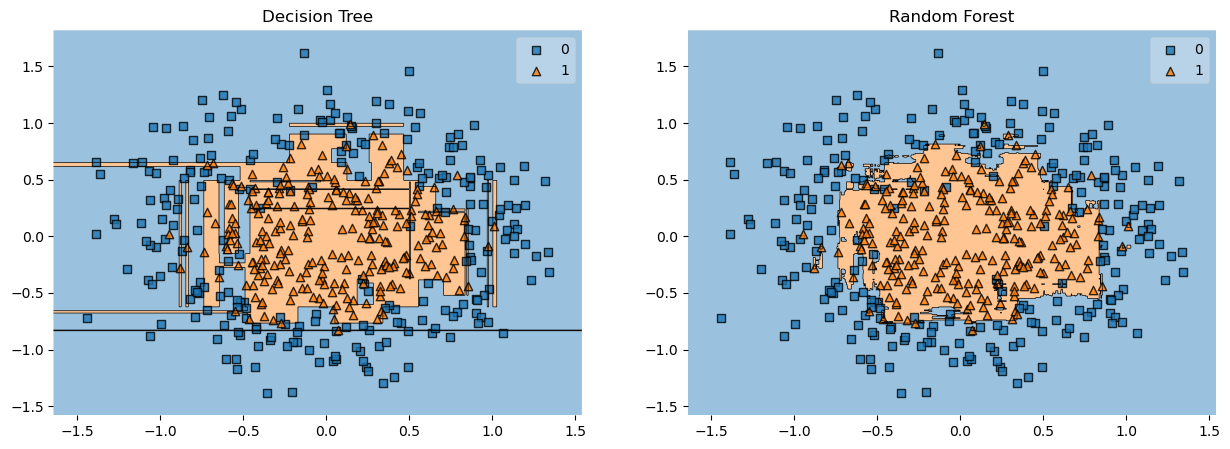

In [95]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
plot_decision_regions(X=X, y=y, clf=dt, zoom_factor=5, ax=ax[0])
ax[0].set_title('Decision Tree')
plot_decision_regions(X=X, y=y, clf=rfc, zoom_factor=5, ax=ax[1])
ax[1].set_title('Random Forest')

# For Regression

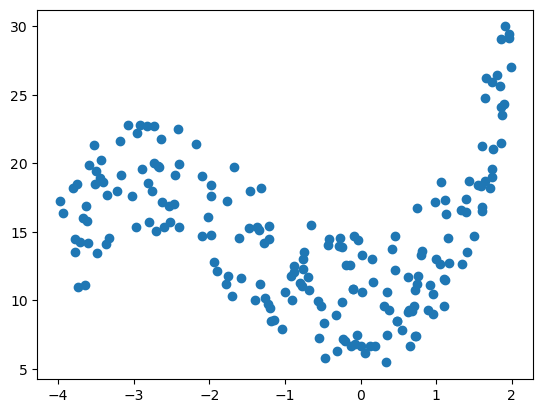

In [208]:
X = ((6*np.random.random(200))-4).reshape(-1,1)
y = 0.7*(X**3) + 3*(X**2) + 5 + (10 * np.random.random(200)).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.scatter(X, y)

### Using Decision Tree Regressor

In [164]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred_train = dtr.predict(X_train)
y_pred_test = dtr.predict(X_test)

print(f'''
Train R2 Score : {r2_score(y_train, y_pred_train)}
Test R2 Score : {r2_score(y_test, y_pred_test)}
''')


Train R2 Score : 1.0
Test R2 Score : 0.3764715631557485



### Using Random Forest Regressor

In [197]:
rfr = RandomForestRegressor(n_estimators=300, max_samples=0.3)    # lesser max samples introduce even more randomness reducing overfitting further
rfr.fit(X_train, y_train.ravel())
y_pred_train = rfr.predict(X_train)
y_pred_test = rfr.predict(X_test)

print(f'''
Train R2 Score : {r2_score(y_train, y_pred_train)}
Test R2 Score : {r2_score(y_test, y_pred_test)}
''')


Train R2 Score : 0.7509908836137422
Test R2 Score : 0.6686433010831137



Text(0.5, 1.0, 'Random Forest')

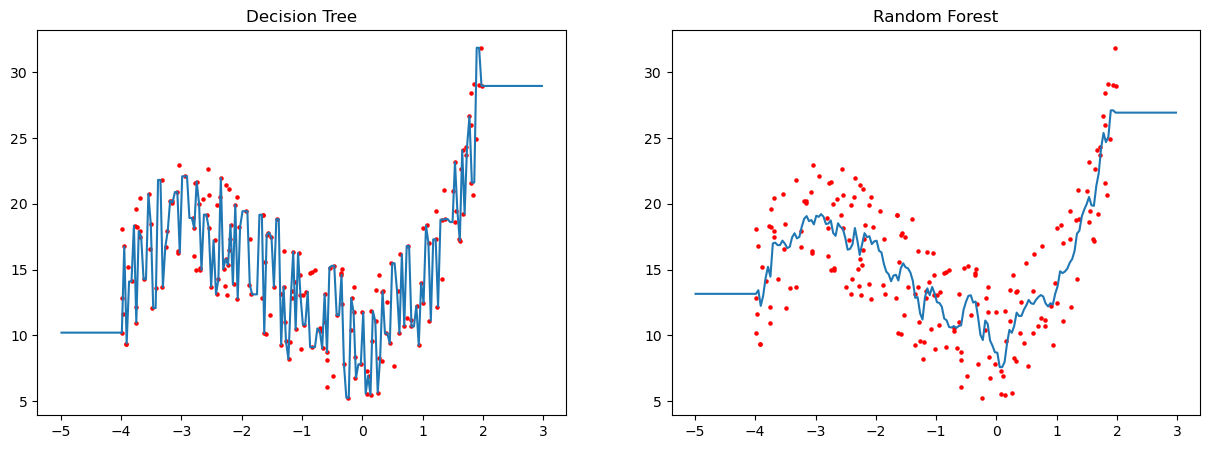

In [198]:
X_plot = np.linspace(min(X)-1, max(X)+1, 200)
y_plot_dtr = dtr.predict(X_plot)
y_plot_rfr = rfr.predict(X_plot)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].scatter(X, y, s=5, c='red')
ax[1].scatter(X, y, s=5, c='red')
ax[0].plot(X_plot, y_plot_dtr)
ax[1].plot(X_plot, y_plot_rfr)
ax[0].set_title('Decision Tree')
ax[1].set_title('Random Forest')

In [226]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators' : [100,200,300,400,500],
    'criterion' : ["squared_error", "absolute_error", "friedman_mse"],
    'max_depth' : [2,3,4,5,None],
    'min_samples_leaf' : [10,50,100],
    'min_samples_split' : [10,50,100],
    'min_impurity_decrease' : [0, 0.2, 0.5, 1, 2],
    'max_samples' : [0.25,0.5,0.75,None]
}

model = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, verbose=1, n_jobs=-1)
model.fit(X_train, y_train.ravel())

Fitting 5 folds for each of 13500 candidates, totalling 67500 fits


GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse'],
                         'max_depth': [2, 3, 4, 5, None],
                         'max_samples': [0.25, 0.5, 0.75, None],
                         'min_impurity_decrease': [0, 0.2, 0.5, 1, 2],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=1)

In [228]:
model.best_params_

{'criterion': 'squared_error',
 'max_depth': 3,
 'max_samples': None,
 'min_impurity_decrease': 0.5,
 'min_samples_leaf': 10,
 'min_samples_split': 10,
 'n_estimators': 100}

In [234]:
model.best_score_

0.64460792610018

In [235]:
model.best_estimator_.score(X_train, y_train)

0.7244949367688354

In [236]:
model.best_estimator_.score(X_test, y_test)

0.48624969850360966